# Title: Add title here
*2023 datathon and conference on Efficient Data Analysis for the Condition Assessment of Bridges*

**Author(s):** Add author name here

**Affiliation(s):** Add author affiliation here



## Abstract
Write abstract here.

## Content
Write the main body of Notebook text below this point.

### Headings and subheadings
To break your document into sections use "##" for section headings and "###" for section subheadings. 

To write *italic* text, enclose the text in "\*". 

To write **bold** text, enclose the text in "\*\*".

### Bullet points and numbered lists

- This is an example of a bullet point.
- This is another example of a bullet point.
    - This is an example of a subpoint

1. This is an example of a numbered list.
1. This continues the numbered list.
    1. This is an example of a nested list.
    1. This is a further subpoint.

### Including equations in Jupyter Notebooks
Notebooks use *LaTex* text formatting. Equations can be written inline, such as $e=mc^2$, or as seperate equation blocks as shown below.

$y = Ax+C$


### Including hyperlinks in Jupyter Notebooks
We can include hyperlinks through combinations of square and rounded brackets like [this](https://blogs.ed.ac.uk/edacab/).

### Including tables in Jupyter Notebooks
Tables use the notation shown below:

| Column 1 | Column 2 | Column 3 |
| --- | --- | --- |
| Value 1 | Description 1  | A note |
| Value 2 | Description 2  | A much longer note to demonstrate how columns expand as needed |
| Value 3 | Description 3  | A third note.|
| Value 4 | Description 4  | A further note |

### Including images in Jupyter Notebooks

To include images we upload them to the notebook and reference them using the HTML code shown below.

<div><center>
    <img src="./Example_Image.JPG" width="25%"/>
</center></div>

### Further help
For further guidance on writing Jupter Notebooks refer to [this guide](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) or [this summary](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet).

## Adding Python code to Jupyter Notebooks
To add Python code to Jupyter notebooks we define a new *code block*. This block behaves like a typical Python interpreter, allowing us to import Python libraries, write function, or define variables. An example block of code is shown below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def example_function(input_data):
    output_data = input_data**2
    return output_data

dat = np.arange(100)
output_dat = example_function(dat)
print('The first ten output values are: '+str(output_dat[:10]))

The first ten output values are: [ 0  1  4  9 16 25 36 49 64 81]


Any variables or functions we have previously defined in carry over to future code blocks, as shown below.

In [2]:
print('The first ten output values are still: '+str(output_dat[:10]))

The first ten output values are still: [ 0  1  4  9 16 25 36 49 64 81]


We can plot figures inline to help demonstrate relationships between variables.

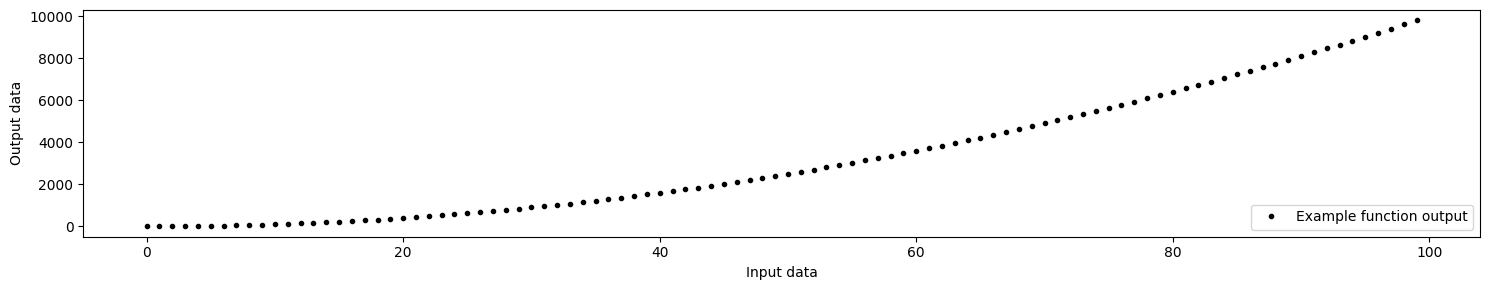

In [3]:
fg,ax = plt.subplots(figsize=(15,3))
ax.plot(dat,output_dat,'k.',label='Example function output')
ax.set_ylabel('Output data')
ax.set_xlabel('Input data')
ax.legend(loc=4)
fg.tight_layout()

## Accessing the shaker table data

This data is stored as a list of dictionaries. The block of code below loads the data and converts it to a nested dictionary.

In [4]:
import urllib
import json
import numpy as np
url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/Part_Sensor_record_data_data.txt"


data = urllib.request.urlopen(url).readlines() # it's a file like object and works just like a file

dat = list(map(json.loads, data))[0]

unique_conditions = np.unique([i['Working condition'] for i in dat])
dat0 = {}

for i in range(len(unique_conditions)):
    tmp = {}
    for entry in dat:
        if entry['Working condition']==unique_conditions[i]:
            tmp['Measuring point: '+entry['Measuring point']]=entry
    dat0['Working condition: '+unique_conditions[i]]=tmp
    del(entry,tmp)
del(i,dat,unique_conditions)

### Data structure
The data is divided into different working conditions, with each working condition containing the data from all measuring points. You can access the list of working conditions and measuring points using the data below.

In [5]:
working_conditions = list(dat0.keys())
print(working_conditions)
measuring_points = list(dat0['Working condition: e1'].keys())
print(measuring_points)

['Working condition: e1', 'Working condition: e2', 'Working condition: e3', 'Working condition: e4']
['Measuring point: A10', 'Measuring point: A1', 'Measuring point: A2', 'Measuring point: A3', 'Measuring point: A4', 'Measuring point: A5', 'Measuring point: A6', 'Measuring point: A7', 'Measuring point: A8', 'Measuring point: A9', 'Measuring point: AY1', 'Measuring point: AY2', 'Measuring point: AY3', 'Measuring point: AY4', 'Measuring point: AY5', 'Measuring point: AY6', 'Measuring point: AY7', 'Measuring point: AZ2', 'Measuring point: AZ3', 'Measuring point: AZ4', 'Measuring point: AZ5', 'Measuring point: AZ6', 'Measuring point: AZ7', 'Measuring point: E11', 'Measuring point: E12', 'Measuring point: E13', 'Measuring point: E14', 'Measuring point: E15', 'Measuring point: E16', 'Measuring point: E17', 'Measuring point: E18', 'Measuring point: R1', 'Measuring point: R2']


### Plotting the data
The block of code below plots all Z direction measuring points alongside their Welch power spectral density for working condition: e1.

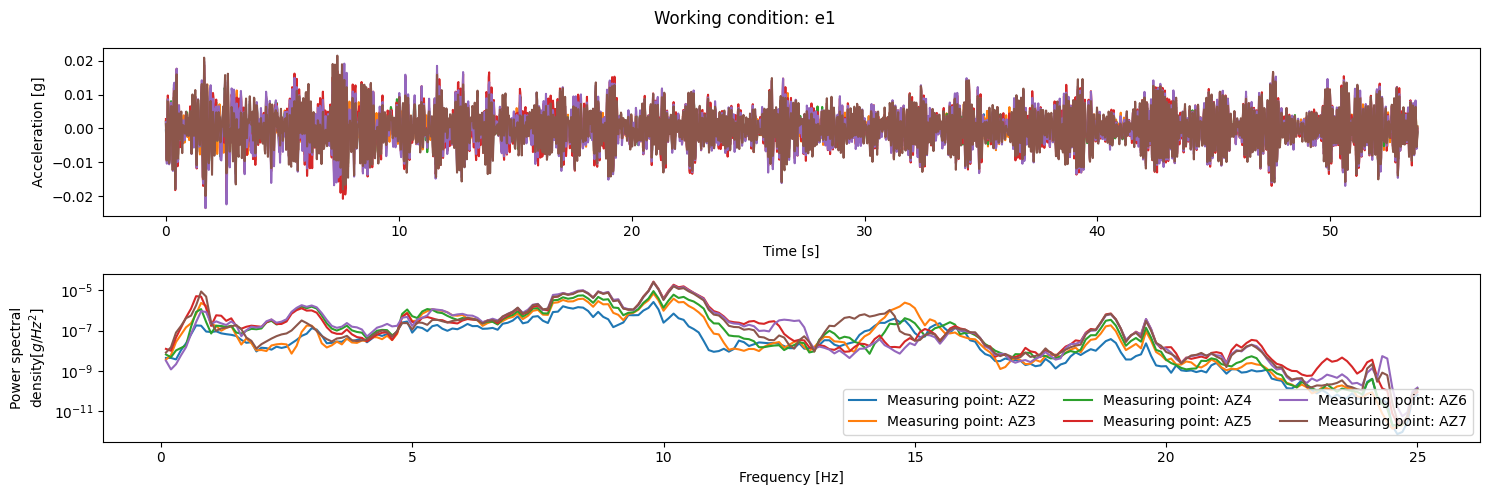

In [6]:
import matplotlib.pyplot as plt
from scipy.signal import welch
condition = 'Working condition: e1'
fs = 50
fg,ax = plt.subplots(2,figsize=(15,5))
for channel in measuring_points:
    f,psd = welch(dat0[condition][channel]['Acceleration'],fs=fs,nperseg=(10*fs))
    channel_name = channel.split()[-1]
    if "Z" in channel_name:
        ax[0].plot(dat0[condition][channel]['Time [s]'],dat0[condition][channel]['Acceleration'],label=channel)
        ax[1].semilogy(f[1:],psd[1:],label=channel)
ax[0].set_ylabel('Acceleration [g]')
ax[1].set_ylabel('Power spectral\ndensity[$g/Hz^2$]')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend(loc=4,ncol=3)
fg.suptitle(condition)
fg.tight_layout()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9df15425-03c5-4773-8629-248ddacc836e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>